### Exploring data info using the session object

Demonstration of which information can be retrieved and explored with the session object

In [1]:
import sys
sys.path.insert(1, '/home/vinicius/GrayData-Analysis')

from GDa.session import session

In [2]:
ses = session(raw_path = '../GrayLab/', monkey = 'lucy', date = '150128', session = 1,\
              slvr_msmod = False, align_to = 'cue', trial_type = 1, \
              behavioral_response = 1, evt_dt = [-0.65, 3.00], save_to_h5=True, h5_path='../raw_lfp') 

In [4]:
print('Trial info keys')
print('------------------------------------------------------------------------------------------------------------------')
print(ses.trial_info.keys())
print('------------------------------------------------------------------------------------------------------------------')
print('Recording info keys')
print('------------------------------------------------------------------------------------------------------------------')
print(ses.recording_info.keys())

Trial info keys
------------------------------------------------------------------------------------------------------------------
dict_keys(['behavioral_response', 'match_image', 'match_location', 'match_on', 'nonmatch_image', 'nonmatch_location', 'num_trials', 'reaction_time', 'sample_image', 'sample_location', 'sample_off', 'sample_on', 'trial_type'])
------------------------------------------------------------------------------------------------------------------
Recording info keys
------------------------------------------------------------------------------------------------------------------
dict_keys(['image_locations', 'image_names', 'image_data', 'channel_count', 'channel_numbers', 'area', 'depth', 'lfp_sampling_rate', 'calib_eye_sampling_rate', 'number_sua', 'ms_mod', 'slvr'])


In [5]:
import matplotlib.pyplot as plt
import numpy             as np

Let's start by exploring some information concerning the trials in 'trial_info' starting by the 'sample_on', and 'sample_off' times.


/opt/ohpc/pub/libs/gnu8/python/3.6.6/lib64/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/ohpc/pub/libs/gnu8/python/3.6.6/lib64/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Sample on')

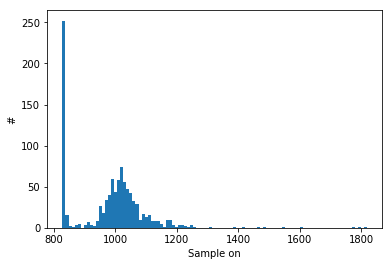

In [6]:
plt.hist(ses.trial_info['sample_on'], 100)
plt.ylabel('#')
plt.xlabel('Sample on')

Text(0.5, 0, 'Sample on')

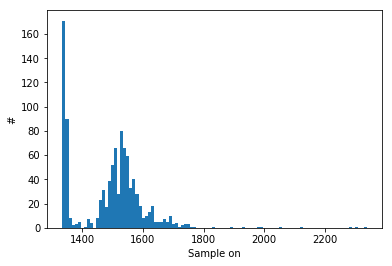

In [7]:
plt.hist(ses.trial_info['sample_off'], 100)
plt.ylabel('#')
plt.xlabel('Sample on')

As one can see the interval of presentation of the cue varies from trial to trial within a session's date, this can be seen further by plotting the histogram of the time differences:

Text(0.5, 0, 'Sample off - Sample on')

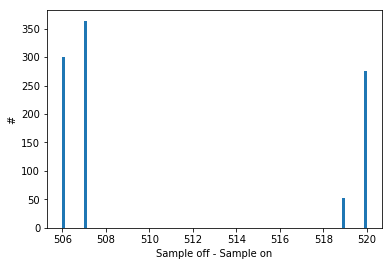

In [8]:
plt.hist(ses.trial_info['sample_off']-ses.trial_info['sample_on'] , 100)
plt.ylabel('#')
plt.xlabel('Sample off - Sample on')

If you plot the 'match_on', and 'match_off' you will notice that the same is truth.

Next, let's look at the recording informations. First let's plot the distribution of channels across areas in the cortex:

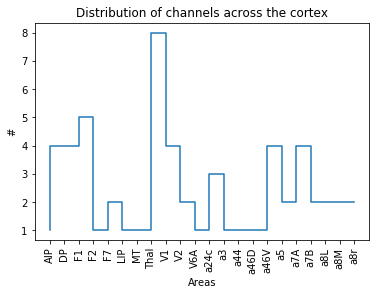

In [9]:
c, x = np.histogram(ses.recording_info['area'], bins = np.unique(ses.recording_info['area']))
plt.step(range(len(c)), c)
plt.xticks(range(len(c)), x, rotation = 90)
plt.ylabel('#')
plt.xlabel('Areas')
plt.title('Distribution of channels across the cortex')
plt.show()

Next, the depth of channels:

Text(0.5, 0, 'Depth (mm)')

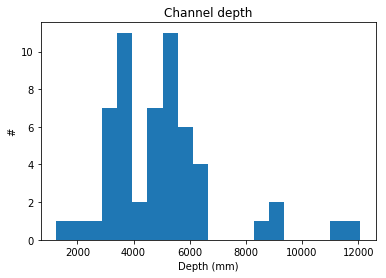

In [10]:
plt.hist(ses.recording_info['depth'], 20)
plt.title('Channel depth')
plt.ylabel('#')
plt.xlabel('Depth (mm)')

And finally, the  image data

([], <a list of 0 Text yticklabel objects>)

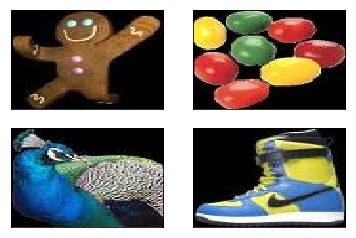

In [11]:
plt.subplot(2,2,1)
plt.imshow(ses.recording_info['image_data'][0], aspect='auto', cmap='jet')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(ses.recording_info['image_data'][1], aspect='auto', cmap='jet')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(ses.recording_info['image_data'][2], aspect='auto', cmap='jet')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(ses.recording_info['image_data'][3], aspect='auto', cmap='jet')
plt.xticks([])
plt.yticks([])

The other informations can be easily explored the same way.